In [1]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"


import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [2]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

In [3]:
countries.cx[:50,:50]

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
5,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
...,...,...
245,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."
246,Zimbabwe,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325..."
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


<Axes: >

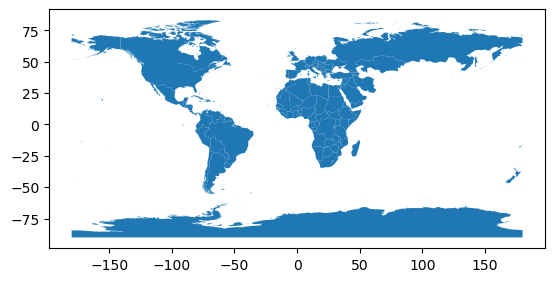

In [4]:
#then
countries.cx[:50,:50].plot()

In [5]:
ecuador =countries[countries.COUNTRY=='Ecuador']

In [6]:
citiesEcuador_clipped = gpd.clip(gdf=cities,
                          mask=ecuador)
riversEcuador_clipped = gpd.clip(gdf=rivers,
                               mask=ecuador)

<Axes: >

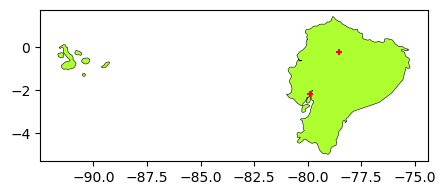

In [7]:
base = ecuador.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesEcuador_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversEcuador_clipped.plot(edgecolor='blue', linewidth=0.4,
                    ax=base)

In [8]:
ecuador.to_crs(24817).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [9]:
# now this works with no warning
ecuador.to_crs(24817).centroid

60    POINT (747799.420 -157334.810)
dtype: geometry

In [10]:
# now this works with no warning
ecuador.to_crs(24817).centroid

60    POINT (747799.420 -157334.810)
dtype: geometry

In [11]:
ecuador_24817=ecuador.to_crs(24817)
cities_Ecuador_24817=citiesEcuador_clipped.to_crs(ecuador_24817.crs)
rivers_Ecuador_24817=riversEcuador_clipped.to_crs(ecuador_24817.crs)

In [12]:
## saving


import os

ecuador_24817.to_file(os.path.join("maps","ecuadorMaps_24817.gpkg"), layer='country', driver="GPKG")
cities_Ecuador_24817.to_file(os.path.join("maps","ecuadorMaps_24817.gpkg"), layer='cities', driver="GPKG")
rivers_Ecuador_24817.to_file(os.path.join("maps","ecuadorMaps_24817.gpkg"), layer='rivers', driver="GPKG")
ecuador_24817.centroid.to_file(os.path.join("maps","ecuadorMaps_24817.gpkg"), layer='centroid', driver="GPKG")

In [13]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","ec-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,308273,SEQM,large_airport,Mariscal Sucre International Airport,-0.125399,-78.354306,7841.0,SA,Ecuador,EC,...,Quito,1,SEQM,UIO,UIO,https://www.aeropuertoquito.aero/?lang=en,https://en.wikipedia.org/wiki/Mariscal_Sucre_I...,Nuevo Aeropuerto Internacional Mariscal Sucre,1000,2024-05-09T15:00:40+00:00
1,6056,SEGU,large_airport,José Joaquín de Olmedo International Airport,-2.157420,-79.883598,19.0,SA,Ecuador,EC,...,Guayaquil,1,SEGU,GYE,NaN,NaN,https://en.wikipedia.org/wiki/Jos%C3%A9_Joaqu%...,Simon Bolivar International Airport,1050,2021-07-31T17:42:30+00:00
2,6055,SEGS,small_airport,Seymour Galapagos Ecological Airport,-0.453758,-90.265900,207.0,SA,Ecuador,EC,...,Isla Baltra,1,SEGS,GPS,NaN,NaN,https://en.wikipedia.org/wiki/Seymour_Airport,NaN,150,2023-10-18T20:59:45+00:00
3,6073,SEQU,heliport,Mariscal Sucre Air Base,-0.136782,-78.490598,9228.0,SA,Ecuador,EC,...,Quito,0,NaN,NaN,NaN,http://www.aeropuertoquito.aero/,https://en.wikipedia.org/wiki/Old_Mariscal_Suc...,"Quito, Ecuador, Dangerous, Closed, Mountains, ...",475,2022-11-24T09:06:36+00:00
352,512243,EC-0058,closed,Haciendó Acapulco Airstrip,1.110251,-79.137712,12.0,SA,Ecuador,EC,...,Rompido,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-09-21T00:36:21+00:00
353,512330,SEAV,heliport,Teniente Pablo Valdéz Carvallo Heliport,-3.446531,-79.980131,23.0,SA,Ecuador,EC,...,Santa Rosa,0,SEAV,NaN,NaN,NaN,NaN,NaN,0,2023-09-22T20:55:06+00:00
354,515472,SELN,heliport,Belén Heliport,-0.241944,-79.312500,1140.0,SA,Ecuador,EC,...,Santo Domingo de los Tsáchilas,0,SELN,NaN,NaN,NaN,NaN,NaN,0,2023-11-21T14:31:13+00:00
355,512910,SEEM,heliport,Emsecor Heliport,-0.222535,-78.377947,8000.0,SA,Ecuador,EC,...,Tumbaco,0,SEEM,NaN,NaN,NaN,NaN,NaN,0,2023-10-05T12:13:17+00:00


In [14]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           356 non-null    object 
 1   type           356 non-null    object 
 2   latitude_deg   356 non-null    float64
 3   longitude_deg  356 non-null    float64
 4   elevation_ft   338 non-null    float64
 5   region_name    356 non-null    object 
 6   municipality   348 non-null    object 
dtypes: float64(3), object(4)
memory usage: 19.6+ KB


In [15]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: >

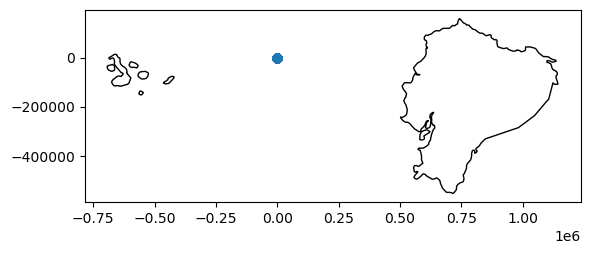

In [16]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=ecuador.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = ecuador_24817.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [17]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

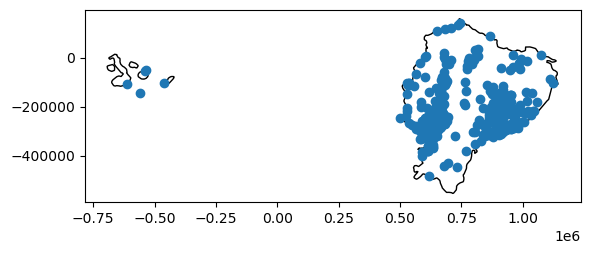

In [18]:
airports_24817=airports.to_crs(24817)

## then

base = ecuador_24817.plot(color='white', edgecolor='black')
airports_24817.plot(ax=base)

In [19]:
airports_24817['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     300
heliport           28
medium_airport     14
closed             12
large_airport       2
Name: count, dtype: int64

In [20]:
airports_24817.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_24817.to_file(os.path.join("maps","ecuadorMaps_24817.gpkg"), layer='airports', driver="GPKG")

In [21]:
ecuador_24817

,COUNTRY,geometry
60,Ecuador,"MULTIPOLYGON (((754437.210 -506808.927, 752831..."


In [22]:
ecuador_24817.boundary

60    MULTILINESTRING ((754437.210 -506808.927, 7528...
dtype: geometry

<Axes: >

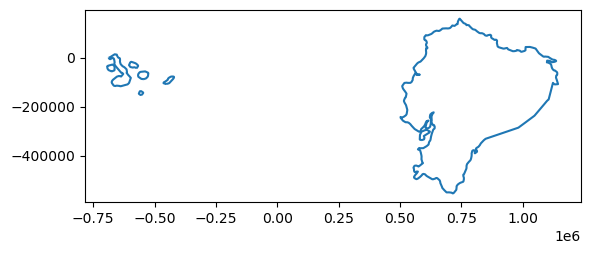

In [23]:
# This is just the borderline
ecuador_24817.boundary.plot()

In [24]:
# does 'boundary' return a GDF?
type(ecuador_24817.boundary)

geopandas.geoseries.GeoSeries

In [25]:
# converting into GDF
ecuador_24817.boundary.to_frame()

,0
60,"MULTILINESTRING ((754437.210 -506808.927, 7528..."


In [26]:
# conversion
ecuador_border=ecuador_24817.boundary.to_frame()

# new column (optional)
ecuador_border['name']='Ecuador'

# renaming the geometry column
ecuador_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
ecuador_border = ecuador_border.set_geometry("geometry")

# verifying:
ecuador_border.crs

<Projected CRS: EPSG:24817>
Name: PSAD56 / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: South America (Ecuador) between 84°W and 78°W, northern hemisphere, onshore.
- bounds: (-80.18, 0.0, -78.0, 1.45)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [27]:
ecuador_states=gpd.read_file(os.path.join("maps","SHP","nxcantones.shp"))
ecuador_municipalities=gpd.read_file(os.path.join("maps","SHP","nxcantones.shp"))

In [28]:
type(ecuador_states), type(ecuador_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [29]:
ecuador_states.geometry.head()

0    POLYGON ((710807.591 9872762.982, 710853.291 9...
1    POLYGON ((720530.210 9793835.659, 720541.380 9...
2    POLYGON ((711141.911 9822095.666, 711185.441 9...
3    POLYGON ((700585.537 9836991.327, 700609.658 9...
4    POLYGON ((721746.267 9813431.090, 721746.237 9...
Name: geometry, dtype: geometry

In [30]:
ecuador_municipalities.geometry.head()

0    POLYGON ((710807.591 9872762.982, 710853.291 9...
1    POLYGON ((720530.210 9793835.659, 720541.380 9...
2    POLYGON ((711141.911 9822095.666, 711185.441 9...
3    POLYGON ((700585.537 9836991.327, 700609.658 9...
4    POLYGON ((721746.267 9813431.090, 721746.237 9...
Name: geometry, dtype: geometry

<Axes: >

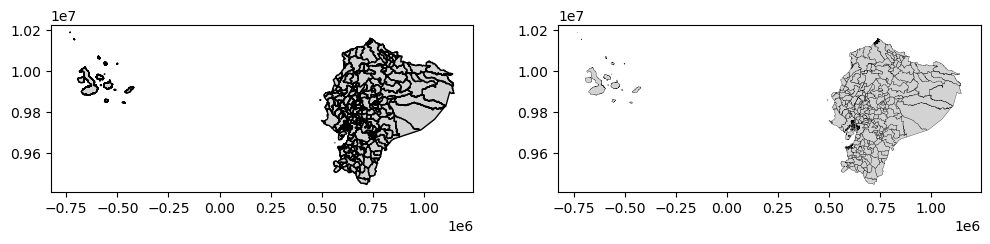

In [31]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ecuador_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
ecuador_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [32]:
ecuador_states.to_crs(24817)

,DPA_VALOR,DPA_ANIO,DPA_CANTON,DPA_DESCAN,DPA_PROVIN,DPA_DESPRO,geometry
0,0,2012,0201,GUARANDA,02,BOLIVAR,"POLYGON ((711057.606 -126871.913, 711103.307 -..."
1,0,2012,0202,CHILLANES,02,BOLIVAR,"POLYGON ((720780.830 -205799.234, 720792.000 -..."
2,0,2012,0203,CHIMBO,02,BOLIVAR,"POLYGON ((711392.313 -177539.271, 711435.844 -..."
3,0,2012,0204,ECHEANDIA,02,BOLIVAR,"POLYGON ((700835.819 -162643.677, 700859.940 -..."
4,0,2012,0205,SAN MIGUEL,02,BOLIVAR,"POLYGON ((721996.743 -186203.775, 721996.714 -..."
...,...,...,...,...,...,...,...
219,0,2012,2002,ISABELA,20,GALAPAGOS,"MULTIPOLYGON (((-613054.697 -109276.449, -6130..."
220,0,2012,2402,LA LIBERTAD,24,SANTA ELENA,"POLYGON ((514628.481 -250518.839, 514628.819 -..."
221,0,2012,1114,PINDAL,11,LOJA,"POLYGON ((596585.197 -444895.275, 596613.489 -..."
222,0,2012,0702,ARENILLAS,07,EL ORO,"POLYGON ((587322.100 -386566.774, 587404.726 -..."


In [33]:
# set as unprojected
ecuador_states.crs = "EPSG:24817"
ecuador_municipalities.crs = "EPSG:24817"

In [34]:
ecuador_states=ecuador_states.to_crs(24817)
ecuador_municipalities=ecuador_municipalities.to_crs(24817)